In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

k = 14
n_samples = 10

instances = pd.read_csv(f"sampled_instances_{n_samples}.csv")
priors = pd.read_csv(f"EP_k_21_Nlat.csv")
instances.set_axis(['S', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'D'], axis=1, inplace=True)
instances['P_SX'] = priors['P_zm']
instances['P_D|SX'] = priors['P_D_zm']

display(instances)

data = pd.read_csv(f'{k}_test.csv')
probs = pd.read_csv(f'EP_k_{k}_Nlat.csv')
data['P_zm'] = probs['P_zm']
data['EP(zm)'] = probs['P_D_zm']
#display(data.head())

#split data df into n_samples parts, each sub_df corresponding to an instance.
val = math.comb(21,k)
df_list = []

for i in range(n_samples):
    df = data.loc[i*val : (i+1)*val-1]
    df['P_D|SX'] = instances.loc[i,'P_D|SX']
    df['EP-prior'] = df['P_D|SX']-df['EP(zm)']
    df_list.append(df)
    
print(f'Length of each dataframe = {len(df_list[0])}')
display(df_list[0].head())

,S,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,D,P_SX,P_D|SX
0,True,False,False,False,True,True,True,False,False,False,...,True,False,True,True,True,True,True,True,1.266358e-06,0.902660
1,False,False,True,False,True,True,False,False,False,False,...,True,False,False,False,True,True,False,False,3.233209e-06,0.444299
2,True,False,False,False,True,True,True,False,True,True,...,True,False,True,False,False,True,True,True,1.089015e-06,0.763442
3,False,False,False,True,False,False,False,True,False,True,...,False,True,False,False,True,False,True,True,2.779197e-06,0.611009
4,False,True,True,True,False,True,False,True,False,False,...,True,False,True,False,True,False,False,True,5.804832e-06,0.941956
5,False,False,False,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,7.237600e-08,0.061106
6,True,False,False,False,True,True,True,True,True,False,...,False,True,True,False,True,False,False,False,2.858084e-08,0.258621
7,False,True,True,False,True,True,True,False,False,False,...,True,True,True,True,True,True,False,True,2.019628e-06,0.707489
8,True,False,False,True,True,True,True,True,False,True,...,False,False,False,False,False,False,True,False,3.901125e-06,0.157337
9,True,True,False,True,False,True,True,True,True,False,...,True,False,False,False,True,False,False,False,3.264063e-06,0.025437


Length of each dataframe = 116280


,S,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X16,X17,X18,X19,X20,D,P_zm,EP(zm),P_D|SX,EP-prior
0,True,False,False,False,True,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,True,0.000078,0.663717,0.90266,0.238943
1,True,False,False,False,True,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,True,0.000103,0.673927,0.90266,0.228733
2,True,False,False,False,True,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,True,0.000069,0.488616,0.90266,0.414044
3,True,False,False,False,True,True,True,False,False,False,...,True,NaN,NaN,NaN,NaN,True,0.000126,0.584623,0.90266,0.318036
4,True,False,False,False,True,True,True,False,False,False,...,NaN,True,NaN,NaN,NaN,True,0.000100,0.664585,0.90266,0.238074


In [2]:
df_list[0]['S'].value_counts()

True    77520
Name: S, dtype: int64

In [13]:
from collections import defaultdict

### Split assignments on D
D_idx = instances.index[instances['D'] == True].tolist()
notD_idx = instances.index[instances['D'] == False].tolist()

print(D_idx)
print(notD_idx)

D_df_list = []
notD_df_list = []

features = df_list[0].columns.values
features = features[0:-5]
true_feature_map = pd.DataFrame(columns = features)
false_feature_map = pd.DataFrame(columns = features)

true_D_map = defaultdict(float)
true_notD_map = defaultdict(float)

false_D_map = defaultdict(float)
false_notD_map = defaultdict(float)

n_top_EP = 10000
n_top_P = 1000
for i in D_idx:
    temp = df_list[i].sort_values(by = 'EP(zm)', ascending=False).head(n_top_EP)
    temp = temp.sort_values(by = 'P_zm', ascending=False).head(n_top_P)
    D_df_list.append(temp)
    for x in features:
        true_D_map[x] += temp[x].to_list().count(True)
        false_D_map[x] += temp[x].to_list().count(False)

    
for i in notD_idx:
    temp = df_list[i].sort_values(by = 'EP(zm)', ascending=True).head(n_top_EP)
    temp = temp.sort_values(by = 'P_zm', ascending=False).head(n_top_P)
    notD_df_list.append(temp)
    for x in features:
        true_notD_map[x] += temp[x].to_list().count(True)
        false_notD_map[x] += temp[x].to_list().count(False)

for k,v in true_D_map.items():
    true_D_map[k] = v/(n_top_P*n_samples)
    true_feature_map.loc[1,k] = true_D_map[k]

for k,v in true_notD_map.items():
    true_notD_map[k] = v/(n_top_P*n_samples)
    true_feature_map.loc[0,k] = true_notD_map[k]
    
for k,v in false_D_map.items():
    false_D_map[k] = v/(n_top_P*n_samples)
    false_feature_map.loc[1,k] = false_D_map[k]

for k,v in false_notD_map.items():
    false_notD_map[k] = v/(n_top_P*n_samples)
    false_feature_map.loc[0,k] = false_notD_map[k]
    

# D_map = sorted(D_map.items(), key=lambda x: x[1], reverse=True)
# notD_map = sorted(notD_map.items(), key=lambda x: x[1], reverse=True)

display(true_feature_map)
display(false_feature_map)
        
# display(D_map)
# print("---------")
# display(notD_map)

[0, 2, 3, 4, 7]
[1, 5, 6, 8, 9]


,S,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
1,0.1862,0.1528,0.1406,0.1324,0.2174,0.3384,0.1296,0.1923,0.057,0.1516,...,0.1596,0.4281,0.1719,0.2936,0.1656,0.3136,0.1377,0.3156,0.1816,0.1722
0,0.2924,0.0034,0.084,0.1631,0.2472,0.3162,0.3372,0.2063,0.1739,0.0429,...,0.0484,0.0623,0.4515,0.1677,0.0085,0.0302,0.0,0.1145,0.0828,0.0892


,S,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
1,0.2681,0.1761,0.0736,0.0849,0.1746,0.0031,0.1494,0.2012,0.3483,0.0926,...,0.1736,0.0,0.184,0.0431,0.1432,0.0583,0.1293,0.0232,0.1863,0.1115
0,0.1343,0.3124,0.2977,0.1699,0.0998,0.029,0.0657,0.1416,0.0884,0.3076,...,0.1914,0.2319,0.0,0.1461,0.2658,0.3192,0.3681,0.1305,0.3028,0.2649


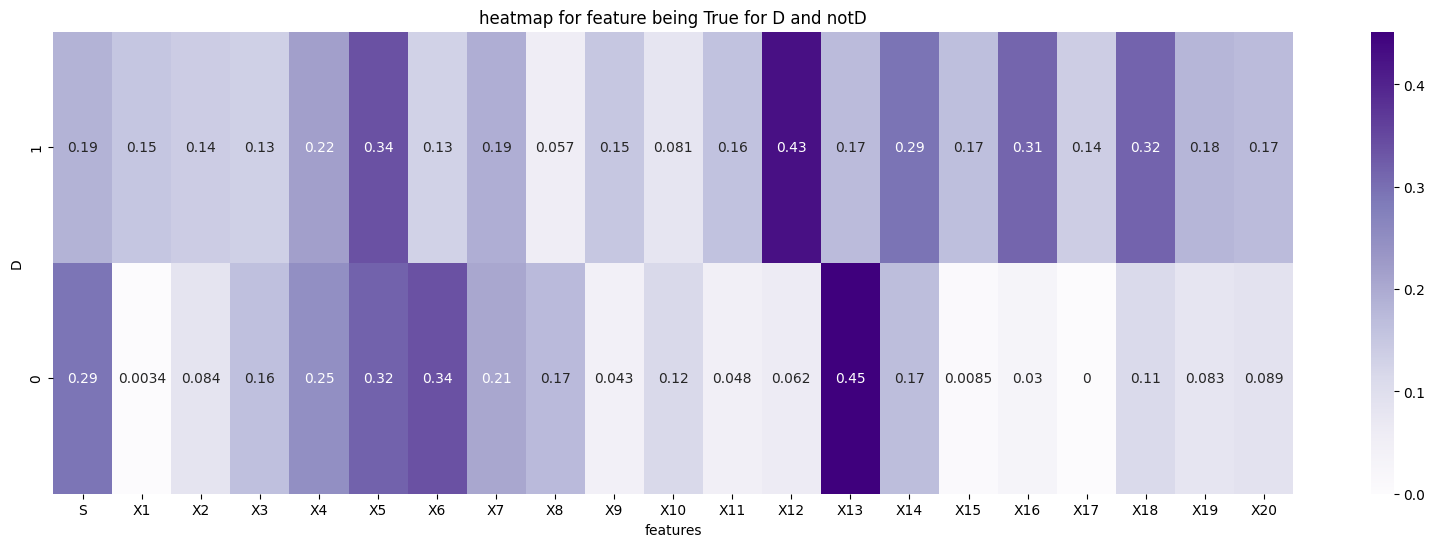

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in features:
    true_feature_map[x] = true_feature_map[x].astype(float)
    
plt.figure(figsize=(20, 6))
sns.heatmap(true_feature_map, annot=True, cmap='Purples')
plt.title('heatmap for feature being True for D and notD')
plt.xlabel('features')
plt.ylabel('D')

plt.show()

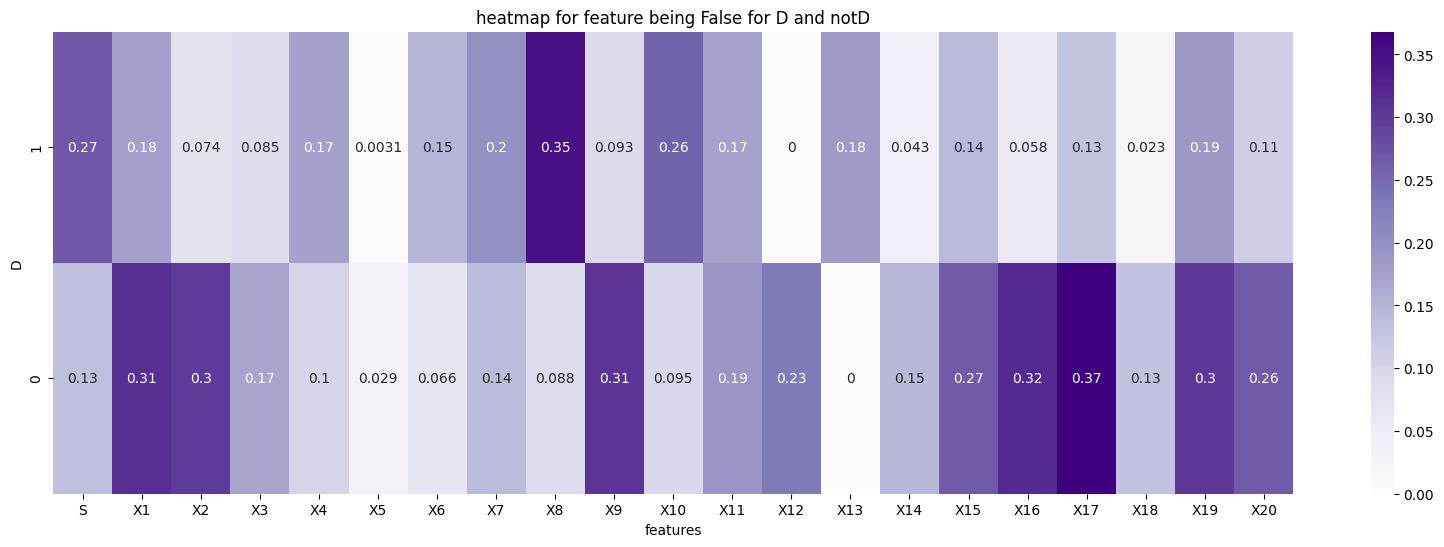

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in features:
    false_feature_map[x] = false_feature_map[x].astype(float)
    
plt.figure(figsize=(20, 6))
sns.heatmap(false_feature_map, annot=True, cmap='Purples')
plt.title('heatmap for feature being False for D and notD')
plt.xlabel('features')
plt.ylabel('D')

plt.show()